In [46]:
# Import all libraries we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import display


# Read the dataset
df=pd.read_csv("C:/Users/luisc/OneDrive/Escritorio/Udacity Nanodegree/Project Housing Singapore/SG_prices.csv")

In [47]:
# Obtain a column with the price per sqm from "resale_price" and "floor_area_sqm" columns

df_price_sqm = df_analysis = df[["town","floor_area_sqm","resale_price"]].copy()
df_price_sqm["price_per_sqm"] = df_price_sqm["resale_price"]/df_price_sqm["floor_area_sqm"]

# Classify the dataset depending on the part of the city
df_price_sqm_area = df_price_sqm.groupby(["town"])

#Obtain the average price per sqm for each component of the group "town"
df_price_sqm_area_mean = df_price_sqm.groupby(["town"]).mean()

# Print the new dataset with the average relase_price, floor_area_sqm and price_per_sqm for each component of the group "town"
df_price_sqm_area_mean[["resale_price","floor_area_sqm","price_per_sqm"]]
df_price_sqm_area_mean

,floor_area_sqm,resale_price,price_per_sqm
town,,,
ANG MO KIO,85.015143,409091.175230,4697.692106
BEDOK,89.234128,409712.076855,4548.822407
BISHAN,108.059899,641283.327238,5904.359382
BUKIT BATOK,95.668433,381446.821712,3960.697836
BUKIT MERAH,87.181590,563574.068842,6377.400329
BUKIT PANJANG,102.519903,429389.414355,4203.531173
BUKIT TIMAH,110.429204,711873.247788,6403.479595
CENTRAL AREA,81.346999,615835.303075,7379.511753
CHOA CHU KANG,110.541435,389175.747877,3540.246995


Text(0.5, 1.0, 'Average apartment price per sqm in Singapore')

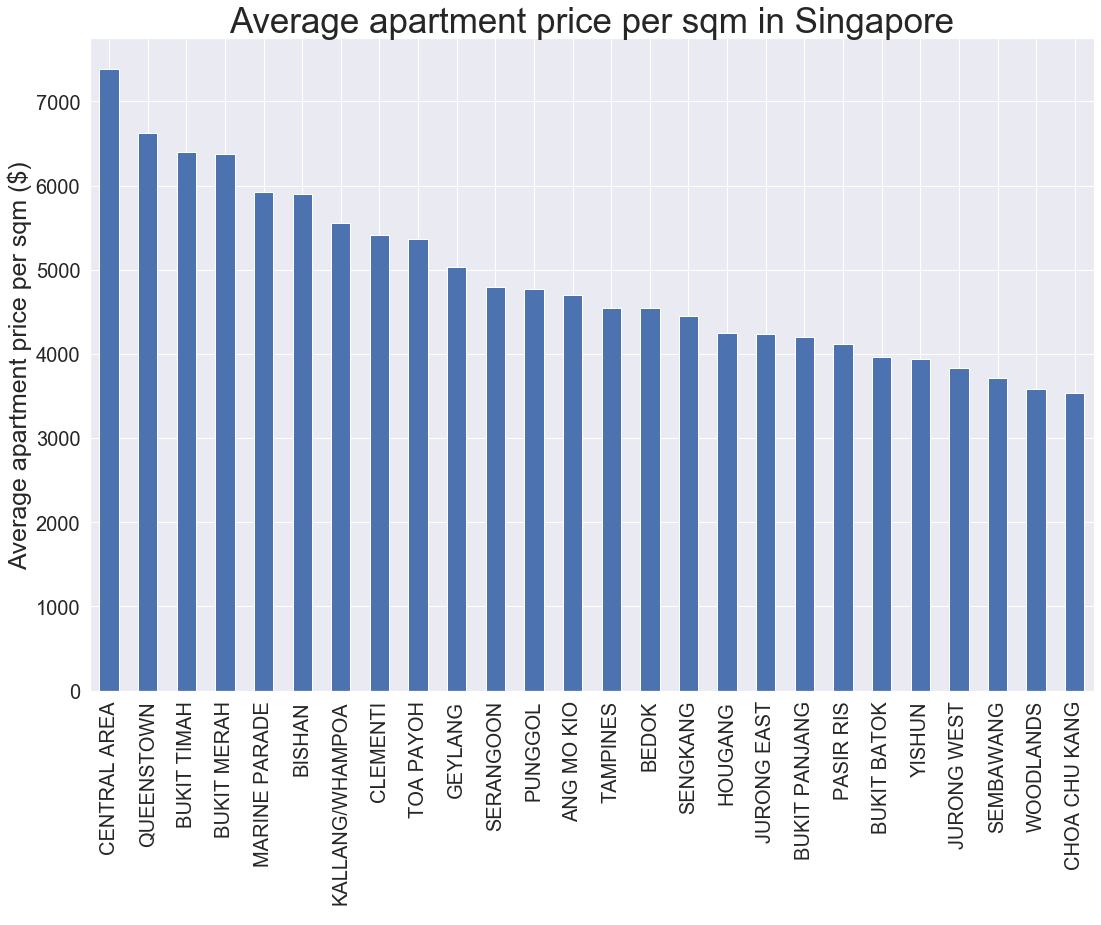

In [48]:
# Bar plot representing average price per sqm for each component of the group "town" in descending order

df_price_sqm_max = df_price_sqm.groupby(["town"])["price_per_sqm"].mean().sort_values(ascending=False)

df_price_sqm_max.plot.bar(width = 0.5, fontsize = 20, figsize=(18,12))

plt.xticks(rotation='vertical')

plt.xlabel(" ")

plt.ylabel('Average apartment price per sqm ($)', fontsize = 25) 

plt.title('Average apartment price per sqm in Singapore', fontsize = 35)

Text(0.5, 1.0, 'Average apartment price in Singapore')

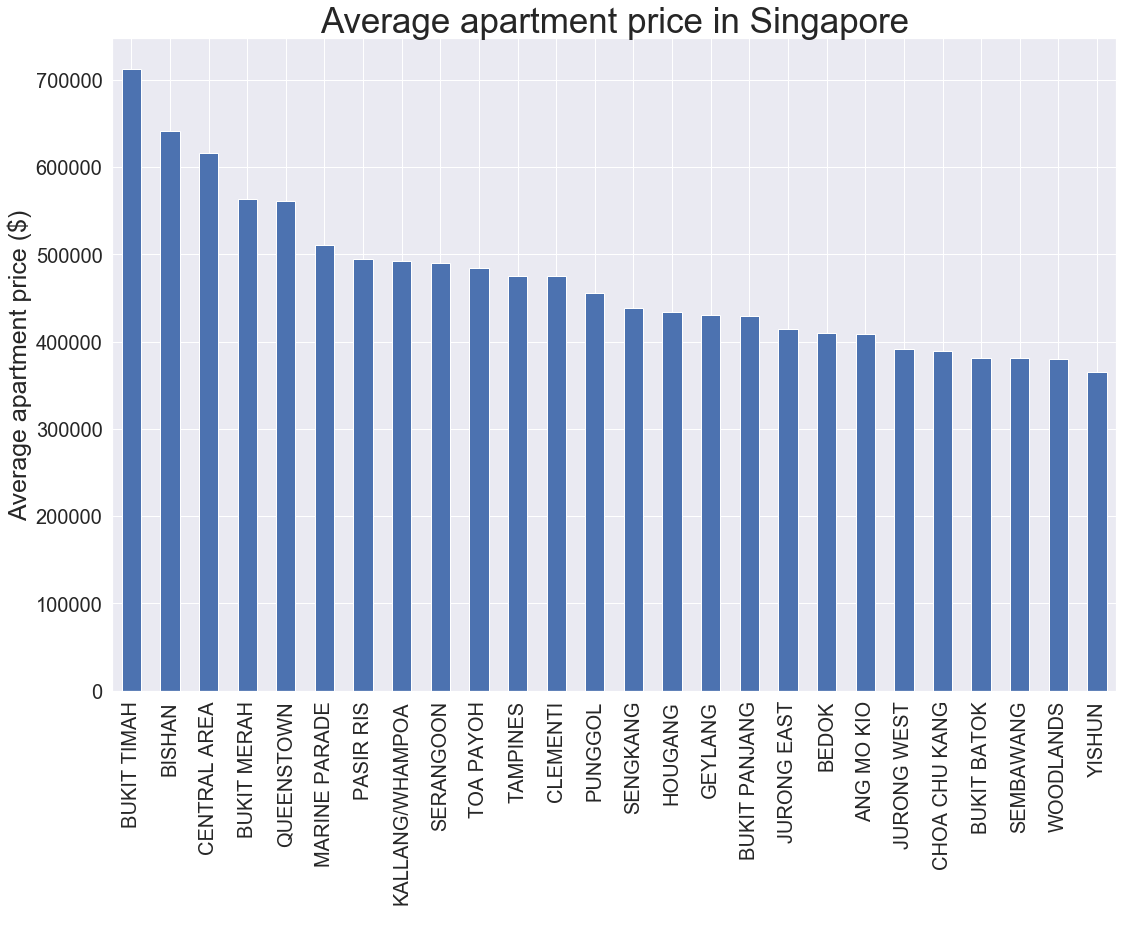

In [49]:
# Bar plot representing average resale price for each component of the group "town" in descending order

df_price_max = df_price_sqm.groupby(["town"])["resale_price"].mean().sort_values(ascending=False)

df_price_max.plot.bar(width = 0.5, fontsize = 20, figsize=(18,12))

plt.xticks(rotation='vertical')

plt.xlabel(" ")

plt.ylabel('Average apartment price ($)', fontsize = 25) 

plt.title('Average apartment price in Singapore', fontsize = 35)

Text(0.5, 1.0, 'Average apartment size in Singapore')

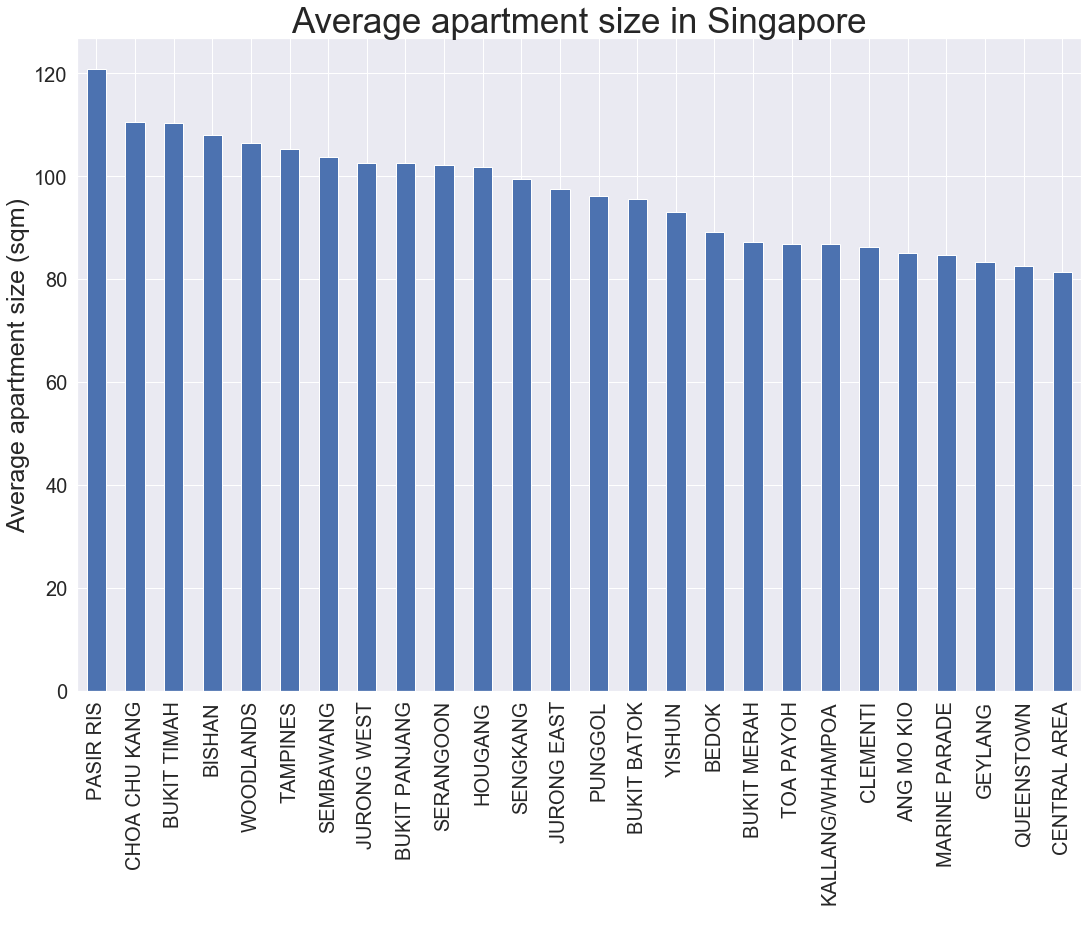

In [50]:
# Bar plot representing average floor area for each component of the group "town" in descending order

df_area_max = df_price_sqm.groupby(["town"])["floor_area_sqm"].mean().sort_values(ascending=False)

df_area_max.plot.bar(width = 0.5, fontsize = 20, figsize=(18,12))

plt.xticks(rotation='vertical')

plt.xlabel(" ")

plt.ylabel('Average apartment size (sqm)', fontsize = 25) 

plt.title('Average apartment size in Singapore', fontsize = 35)

In [51]:
# Extract the columns of interest from the original dataset

df_analysis = df[["town","flat_type","floor_area_sqm", "lease_commence_date", "storey_range","resale_price","flat_model"]].copy()

In [52]:
# Pick three columns as a sample

df_analysis.iloc[[25000, 30000, 35000], :] 

,town,flat_type,floor_area_sqm,lease_commence_date,storey_range,resale_price,flat_model
25000,BUKIT MERAH,3 ROOM,72.0,1980,04 TO 06,450000.0,New Generation
30000,WOODLANDS,4 ROOM,86.0,2000,10 TO 12,338000.0,Model A2
35000,BISHAN,4 ROOM,114.0,1992,25 TO 27,738000.0,Model A


In [53]:
# Drop the rows selected in the previous step from the dataset to be analyzed

df_analysis.drop([25000,30000,35000], axis=0, inplace = True)

Text(0, 0.5, 'Resale Price (SGD)')

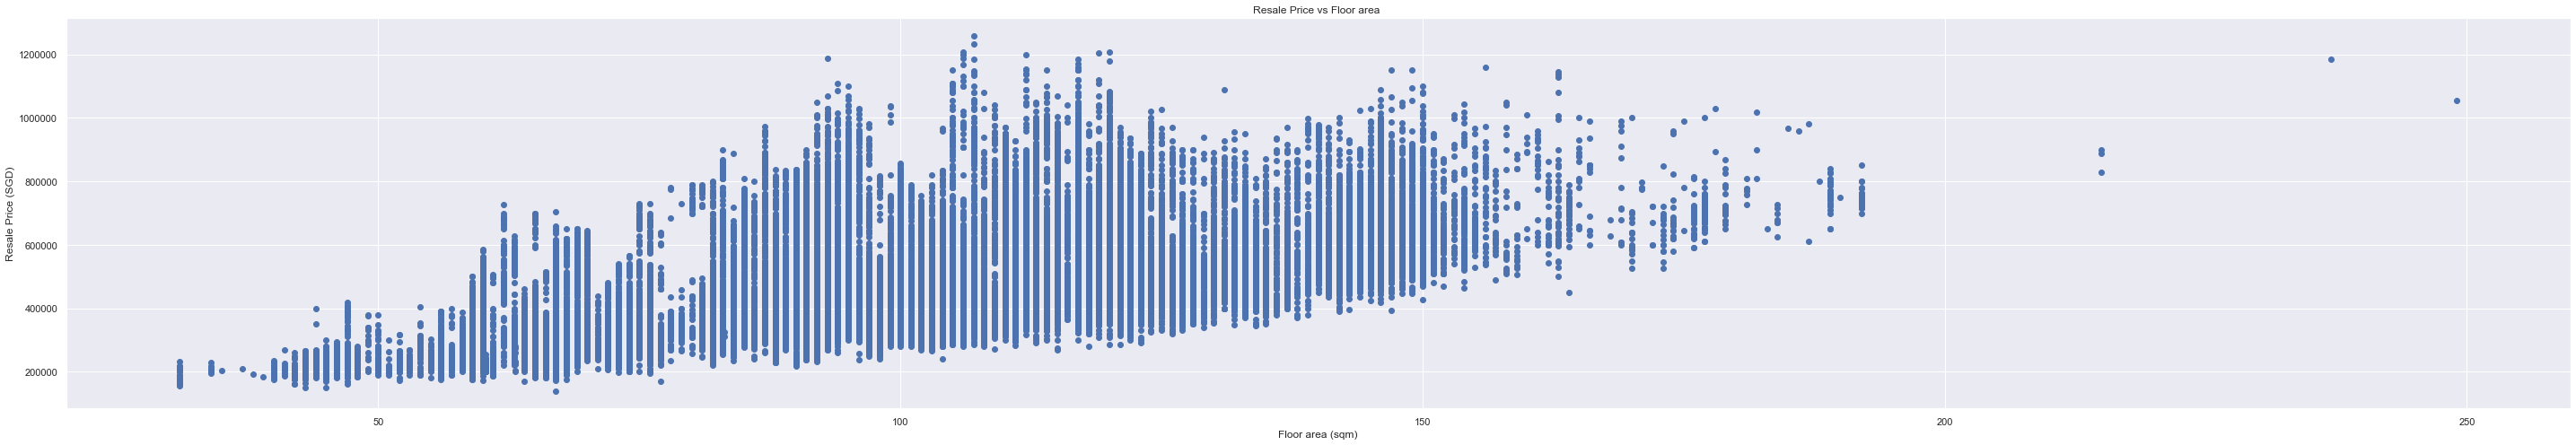

In [54]:
# Scatter plots for "resale price" vs "floor area sqm"

x=df["floor_area_sqm"]
y=df["resale_price"]
plt.scatter(x,y)
plt.title("Resale Price vs Floor area ")
plt.xlabel("Floor area (sqm)")
plt.ylabel("Resale Price (SGD)")

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000.]),
 <a list of 8 Text yticklabel objects>)

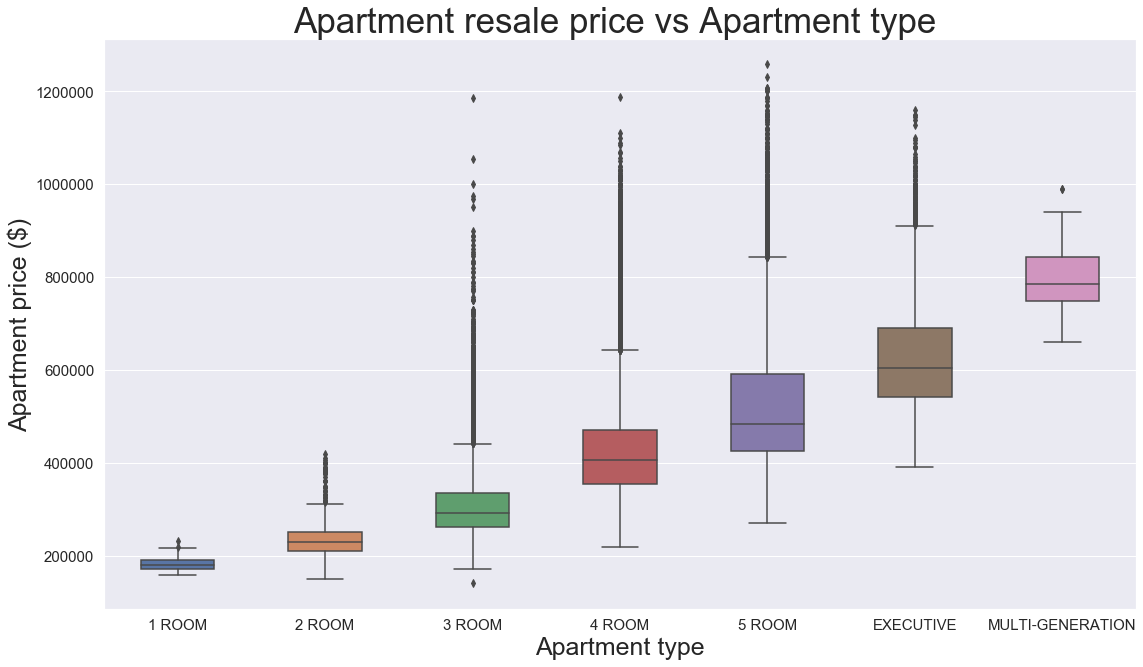

In [55]:
# Box plot for Price vs Flat type

columns_my_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
sns.boxplot(x="flat_type", y="resale_price", data=df, width=0.5, order=columns_my_order).figure.set_size_inches(18.5, 10.5)
columns_my_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTUVE', 'MULTI-GENERATION']
plt.title("Apartment resale price vs Apartment type ", fontsize=35 )
plt.xlabel("Apartment type", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text yticklabel objects>)

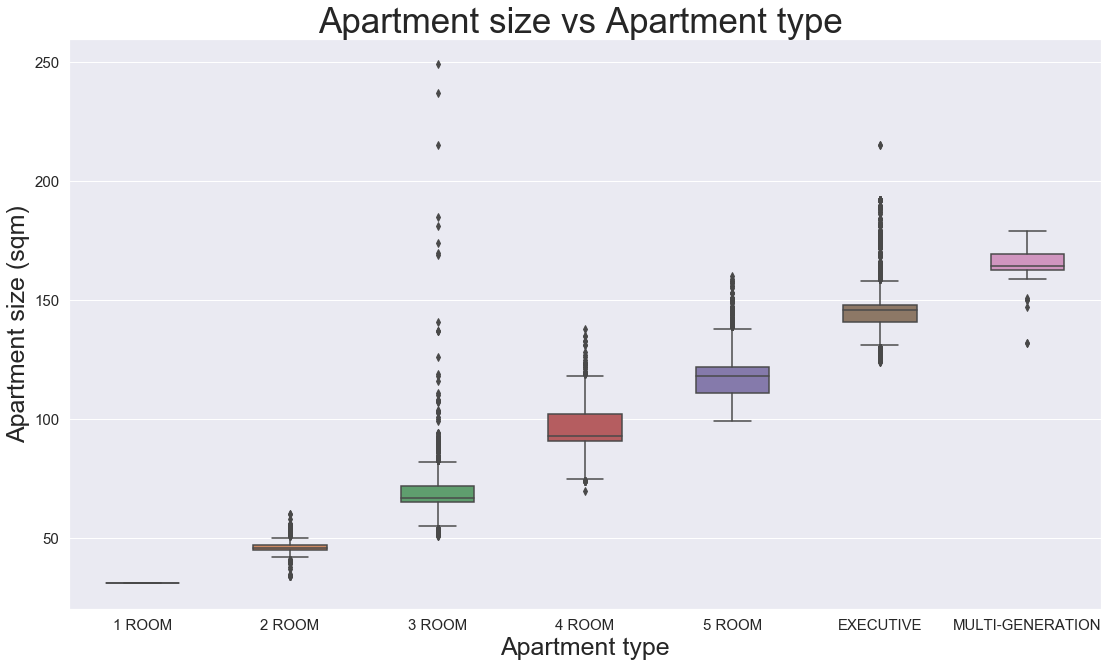

In [56]:
# Box plot for Floor area vs Flat type

columns_my_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
sns.boxplot(x="flat_type", y="floor_area_sqm", data=df, width=0.5, order=columns_my_order).figure.set_size_inches(18.5, 10.5)
columns_my_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTUVE', 'MULTI-GENERATION']
plt.title("Apartment size vs Apartment type ", fontsize=35 )
plt.xlabel("Apartment type", fontsize=25)
plt.ylabel("Apartment size (sqm)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

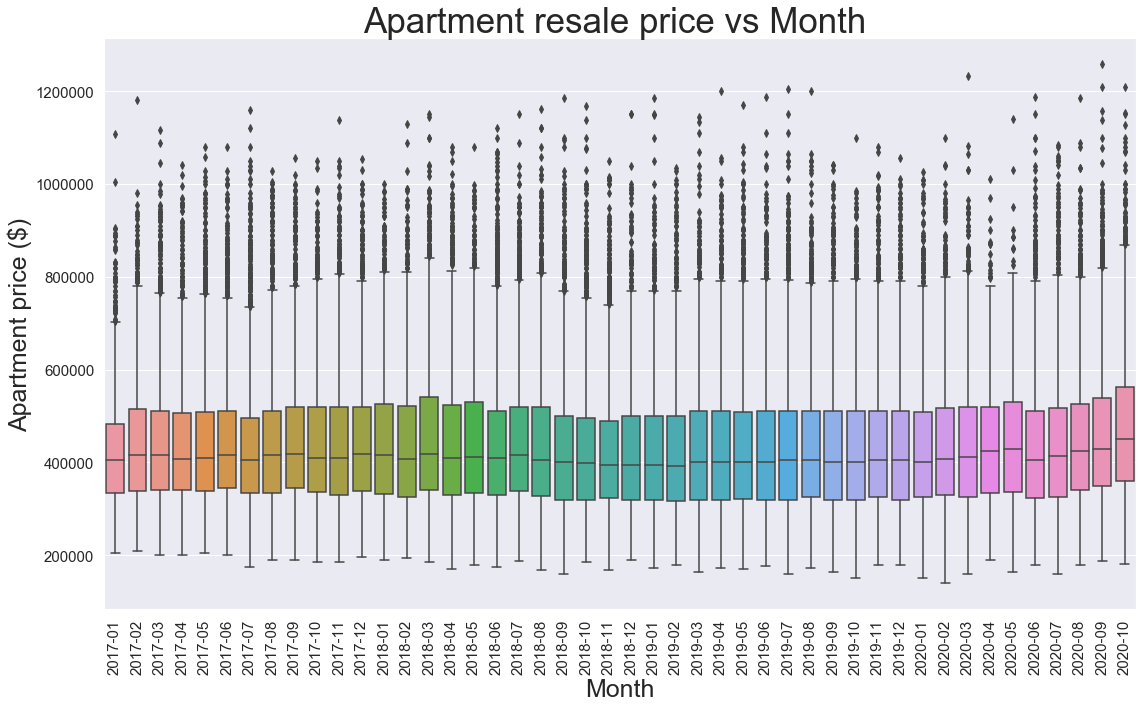

In [57]:
# Box plot for Price vs Month

sns.boxplot(x="month", y="resale_price", data=df).figure.set_size_inches(18.5, 10.5)

plt.title("Apartment resale price vs Month ", fontsize=35 )
plt.xlabel("Month", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

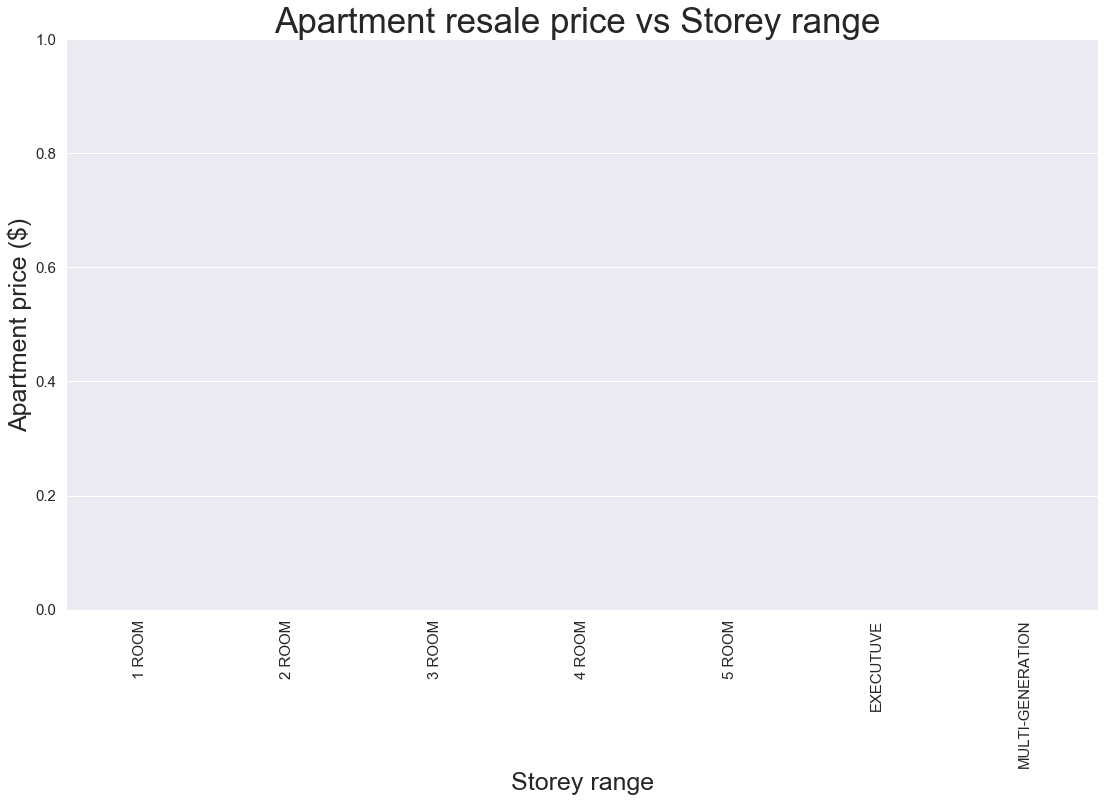

In [58]:
# Box plot for Price vs Storey range

sns.boxplot(x="storey_range", y="resale_price", data=df, order=columns_my_order).figure.set_size_inches(18.5, 10.5)
columns_my_order=["01 TO 03", "04 TO 06", "07 TO 09", "10 TO 12", "13 TO 15", "16 TO 18", "19 TO 21", "22 TO 24", "25 TO 27", "28 TO 30", "31 TO 33", "34 TO 36", "37 TO 39", "40 TO 42", "43 TO 45", "46 TO 48", "49 TO 51"]
plt.title("Apartment resale price vs Storey range ", fontsize=35)
plt.xlabel("Storey range", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

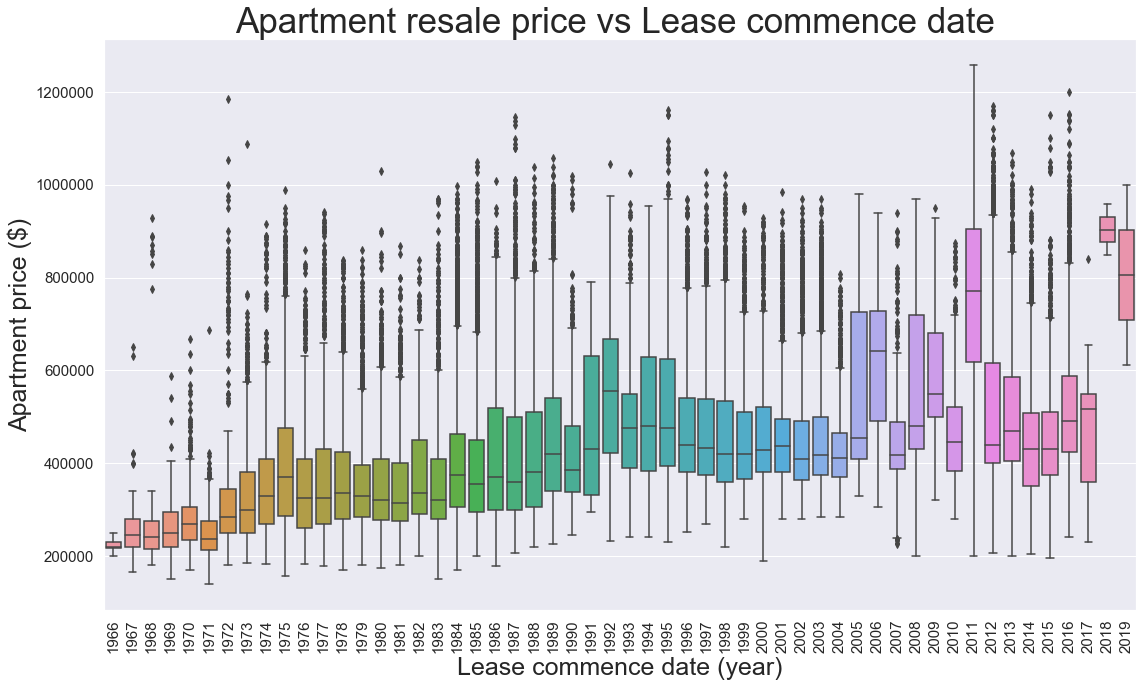

In [59]:
# Box plot for town vs room_type

sns.boxplot(x="lease_commence_date", y="resale_price", data=df).figure.set_size_inches(18.5, 10.5)

plt.title("Apartment resale price vs Lease commence date ", fontsize=35)
plt.xlabel("Lease commence date (year)", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

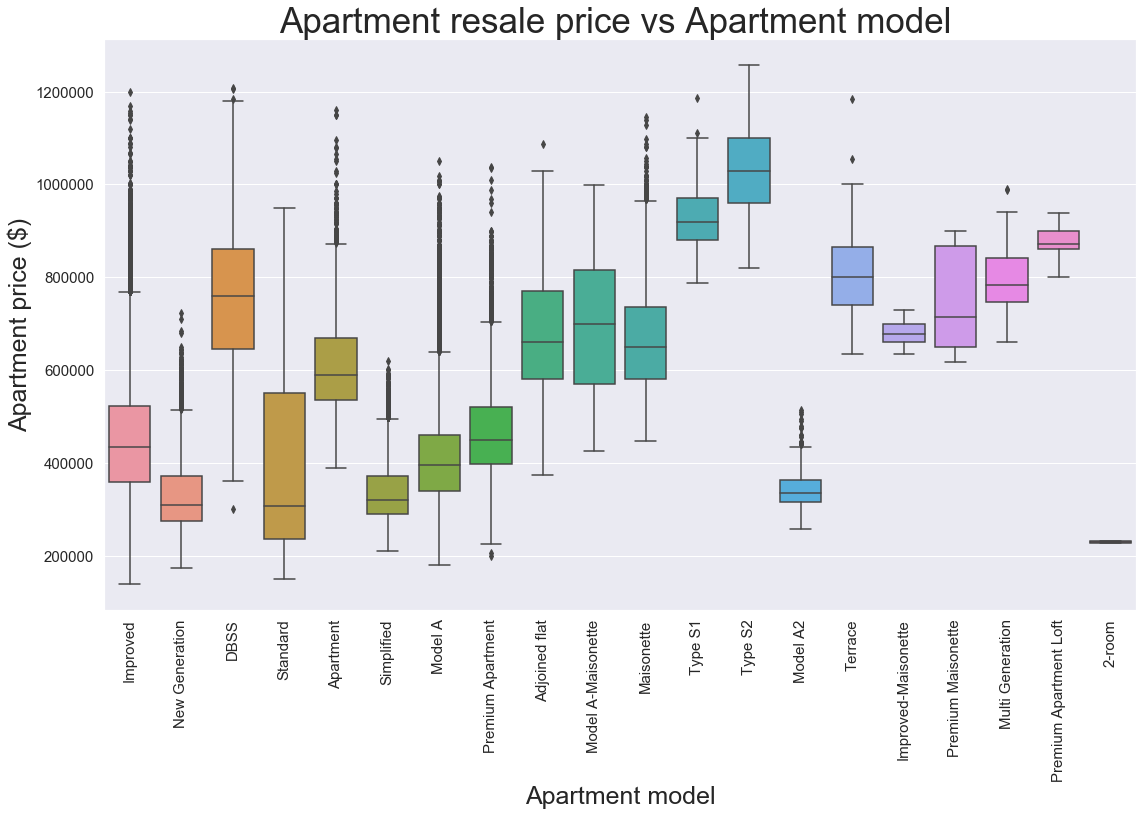

In [60]:
# Box plot for flat model vs room_type

sns.boxplot(x="flat_model", y="resale_price", data=df).figure.set_size_inches(18.5, 10.5)

plt.title("Apartment resale price vs Apartment model ", fontsize=35)
plt.xlabel("Apartment model", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(rotation='vertical')

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000.]),
 <a list of 8 Text yticklabel objects>)

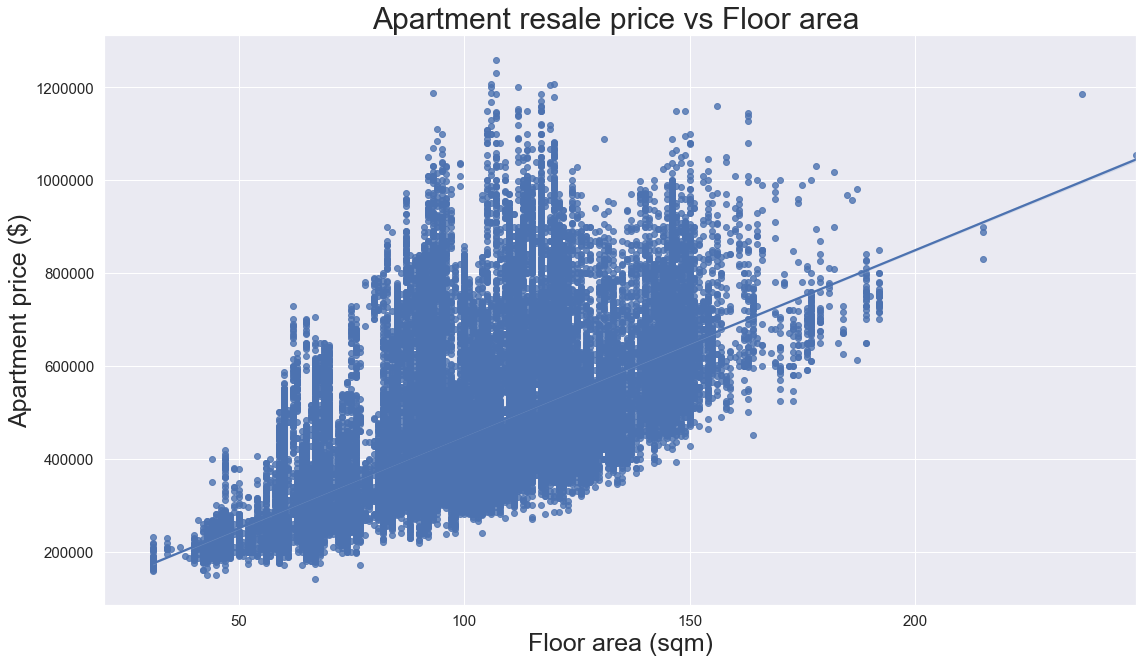

In [61]:
# Regression line for "resale price" vs "floor area sqm"

sns.regplot(x="floor_area_sqm", y="resale_price", data=df).figure.set_size_inches(18.5, 10.5)
plt.title("Apartment resale price vs Floor area ", fontsize=30 )
plt.xlabel("Floor area (sqm)", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
pearson_coef, p_value = stats.pearsonr(df["floor_area_sqm"],df["resale_price"])
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

In [62]:
# Obtain the pearson coefficient of the lineal regression

pearson_coef

0.6310142296739811

In [63]:
# Obtain the p-value of the lineal regression

p_value

0.0

c:\users\luisc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


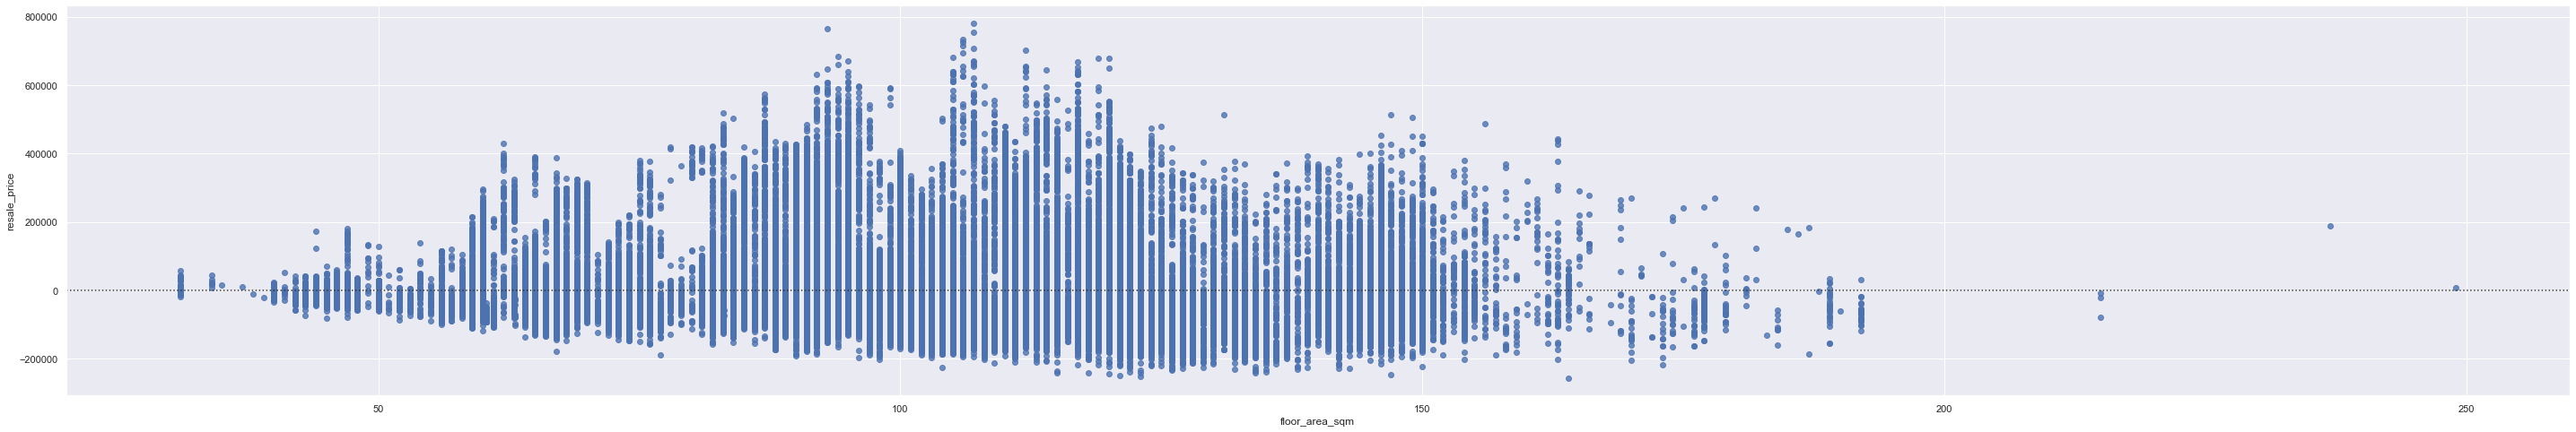

In [64]:
# Obtain the residual plot of resale_price against floor_area_sqm

sns.residplot(df["floor_area_sqm"],df["resale_price"])

In [65]:
# This function will allow us create dummy columns for the categorical variables 
# and drop the original columns corresponding to them
# Numerical variables will remain in the df without modifications

def create_dummy_df(df):
 
    cat_df = df.select_dtypes(include=['object'])
    cat_cols = cat_df.columns
    '''
    
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=0)], axis=1)
        except:
            continue
    return df

In [66]:
# Call the function created in the previous step, selecting df_analysis as input

# A generic df with dummy columns for all categorical variables will be created
# Original columns for all categorical variables will be removed

df_analysis_dummy = create_dummy_df(df_analysis)

In [67]:
# Check the columns resulting from the creation of df_analysis_dummy in the previous step

df_analysis_dummy.columns

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION',
       'storey_range_01 TO 03', 'storey_range_04 TO 06',
       'storey_range_07 TO 09', 'storey_range_10 TO 12',
       'storey_range_13 TO 15', 'storey_range_16 TO 18',
       'storey_range_19 TO 21', 'storey_range_22 TO 24',
   

In [74]:
# Corresponding to the row 25000 of the original dataset
# input=[["BUKIT MERAH"], ["3 ROOM"], [72], [1980], ["04 TO 06"], ["New Generation"]]

# Corresponding to the row 30000 of the original dataset
input=[["WOODLANDS"], ["4 ROOM"], [86], [2000], ["10 TO 12"], ["Model A2"]]

# Corresponding to the row 35000 of the original dataset
# input=[["BISHAN"], ["4 ROOM"], [114], [1992], ["25 TO 27"], ["Model A"]]

In [75]:
# The input will be transformed so that it has the same columns as df_analysis_dummy, so that it can be processed by
# the model and therefore a predicted resale price can be obtained

keys_df_analysis = ["town", "flat_type", "floor_area_sqm", "lease_commence_date", "storey_range", "flat_model"]

df_input = pd.DataFrame.from_dict(dict(zip(keys_df_analysis,input)))

df_input = pd.concat([df_input.drop("town", axis=1), pd.get_dummies(df_input["town"], prefix="town", prefix_sep='_', drop_first=False, dummy_na=0)], axis = 1)

df_input = pd.concat([df_input.drop("flat_type", axis=1), pd.get_dummies(df_input["flat_type"], prefix="flat_type", prefix_sep='_', drop_first=False, dummy_na=0)], axis = 1)

df_input = pd.concat([df_input.drop("storey_range", axis=1), pd.get_dummies(df_input["storey_range"], prefix="storey_range", prefix_sep='_', drop_first=False, dummy_na=0)], axis = 1)

df_input = pd.concat([df_input.drop("flat_model", axis=1), pd.get_dummies(df_input["flat_model"], prefix="flat_model", prefix_sep='_', drop_first=False, dummy_na=0)], axis = 1)
                    
missing_cols = set(df_analysis_dummy.columns) - set(df_input.columns)

for c in missing_cols:
    df_input[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
df_input = df_input[df_analysis_dummy.columns]

df_input_final = df_input.drop("resale_price", axis=1)

In [76]:
# Split the dataset into an X matrix and a response vector y
X = df_analysis_dummy.drop("resale_price", axis=1)
y = df_analysis_dummy["resale_price"]
    
# Create training and test sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state=200) 
    
# Instantiate a LinearRegression model with normalized data
lm_model = LinearRegression(normalize=True) # Instantiate
    
# Fit your model to the training data
lm_model.fit(X_train, y_train) #Fit
    
#9 Predict the response for the training data and the test data
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
    
#10 Obtain an rsquared value for both the training and test data
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

Price_predicted = lm_model.predict(df_input_final)

In [77]:
# Obtain the r-square value for the train set
test_score

0.8647106064772204

In [78]:
# Obtain the r-square value for the test set
train_score

0.865105256397623

In [79]:
# Obtain a prediction of resale price
Price_predicted

array([321200.])